In [1]:
!apt-get install -qq curl g++ make

In [2]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   826k      0 --:--:-- --:--:-- --:--:--  825k


In [3]:
import os
os.chdir('spatialindex-src-1.8.5')

In [4]:
!./configure

checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for a sed that does not truncate output... /bin/sed
checking fo

In [5]:
!make

Making all in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making all in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
depbase=`echo Buffer.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ../../libtool  --tag=CXX   --mode=compile g++ -DPACKAGE_NAME=\"spatialindex\" -DPACKAGE_TARNAME=\"spatialindex-src\" -DPACKAGE_VERSION=\"1.8.5\" -DPACKAGE_STRING=\"spatialindex\ 1.8.5\" -DPACKAGE_BUGREPORT=\"mhadji@gmail.com\" -DPACKAGE_URL=\"\" -DSTDC_HEADERS=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_STDLIB_H=1 -DHAVE_STRING_H=1 -DHAVE_MEMORY_H=1 -DHAVE_STRINGS_H=1 -DHAVE_INTTYPES_H=1 -DHAVE_STDINT_H=1 -DHAVE_UNISTD_H=1 -DHAVE_DLFCN_H=1 -DLT_OBJDIR=\".libs/\" -DPACKAGE=\"spatialindex-src\" -DVERSION=\"1.8.5\" -DHAVE_FCNTL_H=1 -DHAVE_UNISTD_H=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_PTHREAD_H=1 -DHAVE_SYS_RESOURCE_H=1 -DHAVE_SYS_TIME_H=1 -DHAVE_STDINT_H=1 -DHAVE_FEATURES_H=1 -DHAVE_GETTIMEOFDAY=1 -DHAVE_MEM

In [6]:
!make install

Making install in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/src/spatialindex'
Making i

In [7]:
!pip install rtree

     |████████████████████████████████| 1.0 MB 5.3 MB/s 


In [8]:
!ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [9]:
from rtree import index
from rtree.index import Rtree

In [10]:
pip install pandas geopandas geopy

     |████████████████████████████████| 1.0 MB 4.5 MB/s 
     |████████████████████████████████| 6.3 MB 42.3 MB/s 
     |████████████████████████████████| 16.7 MB 41.6 MB/s 


In [11]:
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
import pandas as pd
import geopandas as gpd
import geopy

In [12]:
data = pd.ExcelFile("/content/drive/MyDrive/Flexatel_probation/script/Portfolio2.xlsx")
df = pd.read_excel(data)

In [13]:
locator = Nominatim(user_agent="my_request")

In [14]:
# датафрэйм с нулевыми координатами
new_df = df[df['Y_LAT'].isnull()]

In [15]:
# геокодировали адреса, там где нулевые координаты. 
geocode = locator.geocode
new_df['location'] = new_df['address'].apply(geocode)
new_df['point'] = new_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
del new_df['Y_LAT']
del new_df['X_LON']
new_df = new_df.dropna()

In [17]:
new_df[['Y_LAT_x', 'X_LON_x', 'altitude']] = pd.DataFrame(new_df['point'].tolist(), index=df.index)

In [18]:
df = df.merge(new_df, on='name', how='left')

In [19]:
df['Y_LAT'] = df['Y_LAT'].fillna(df['Y_LAT_x']) 
df['X_LON'] = df['X_LON'].fillna(df['X_LON_x']) 

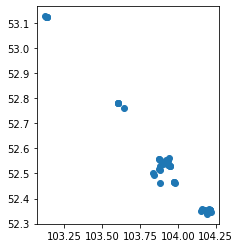

In [20]:
new_gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=gpd.points_from_xy(df.X_LON, df.Y_LAT))
new_gdf.plot()

In [21]:
russia = gpd.read_file('/content/drive/MyDrive/Flexatel_probation/script/admpol.shp')

In [22]:
russia_new = russia[['geometry', 'name']].to_crs('epsg:4326')

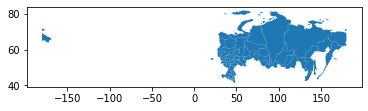

In [23]:
russia_new.plot()

In [24]:
adress = gpd.sjoin(new_gdf, russia_new)

In [29]:
adress = adress[['objecttype_x','Y_LAT','X_LON','name_left','storyes_x','material_x','address_x','name_right']]

In [ ]:
adress.to_file('/content/drive/MyDrive/Flexatel_probation/adres_new.shp')  